In [13]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import ncem
import numpy as np
import scanpy as sc
import seaborn as sns


from scipy.stats import ttest_rel, ttest_ind

dir_gs = "/storage/groups/ml01/workspace/anna.schaar/tissue/grid_searches_gen/"
dir_data = "/storage/groups/ml01/workspace/anna.schaar/tissue/data/"

sns.set_palette("colorblind")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# MIBI TOF - cancer

In [2]:
gs_linear = ncem.train.GridSearchContainer(
    dir_gs, 
    gs_ids=[
        "210419_INTERACTIONS_BASELINE_NONE_NODES_IMAGE_1_HARTMANN",
        "210419_INTERACTIONS_MAX_NODES_IMAGE_1_HARTMANN",
    ],
    lateral_resolution = 400/1024
)
gs_linear.load_gs()

210419_INTERACTIONS_BASELINE_NONE_NODES_IMAGE_1_HARTMANN: loaded 1 runs with 3-fold cross validation
210419_INTERACTIONS_MAX_NODES_IMAGE_1_HARTMANN: loaded 24 runs with 3-fold cross validation


subset was empty, available values for model are ['INTERACTIONS_MAX_NODES_IMAGE_1'], given was ['INTERACTIONS_BASELINE_NONE_NODES_IMAGE_1']
subset was empty, available values for model are ['INTERACTIONS_MAX_NODES_IMAGE_1'], given was ['INTERACTIONS_BASELINE_NONE_NODES_IMAGE_1']
subset was empty, available values for model are ['INTERACTIONS_MAX_NODES_IMAGE_1'], given was ['INTERACTIONS_BASELINE_NONE_NODES_IMAGE_1']
subset was empty, available values for model are ['INTERACTIONS_MAX_NODES_IMAGE_1'], given was ['INTERACTIONS_BASELINE_NONE_NODES_IMAGE_1']
subset was empty, available values for model are ['INTERACTIONS_MAX_NODES_IMAGE_1'], given was ['INTERACTIONS_BASELINE_NONE_NODES_IMAGE_1']


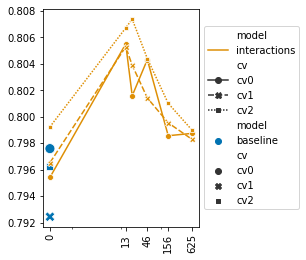

In [3]:
gs_linear.plot_best_model_by_hyperparam(
    partition_show="test",
    metric_show="r_squared_linreg",
    partition_select="val",
    metric_select="r_squared_linreg",
    param_x="um_radius",
    param_hue="model",
    graph_model_class='interactions',
    baseline_model_class='interactions_baseline',
    rename_levels = [
        ("model", {
            "INTERACTIONS_BASELINE_NONE_NODES_IMAGE_1": "baseline",
            "INTERACTIONS_MAX_NODES_IMAGE_1": "interactions",
        })
    ],
    palette = {"baseline": "C0", "interactions": "C1"},
    xticks=[0, 13, 46, 156, 625],
    plot_mode = 'lineplot',
)

In [4]:
test_id_interaction = gs_linear.get_best_model_id(
    subset_hyperparameters=[("model", "INTERACTIONS_MAX_NODES_IMAGE_1")],
    partition_select='test', metric_select="r_squared_linreg"
)
interaction_test_r2 = np.array(
    gs_linear.summary_table[gs_linear.summary_table["run_id"] ==test_id_interaction]['test_r_squared_linreg']
)
test_id_baseline = gs_linear.get_best_model_id(
    subset_hyperparameters=[("model", "INTERACTIONS_BASELINE_NONE_NODES_IMAGE_1")],
    partition_select='test', metric_select="r_squared_linreg"
)
baseline_test_r2 = np.array(
    gs_linear.summary_table[gs_linear.summary_table["run_id"] ==test_id_baseline]['test_r_squared_linreg']
)

print(ttest_rel(interaction_test_r2, baseline_test_r2))

Ttest_relResult(statistic=7.293874940893317, pvalue=0.01828287301718189)


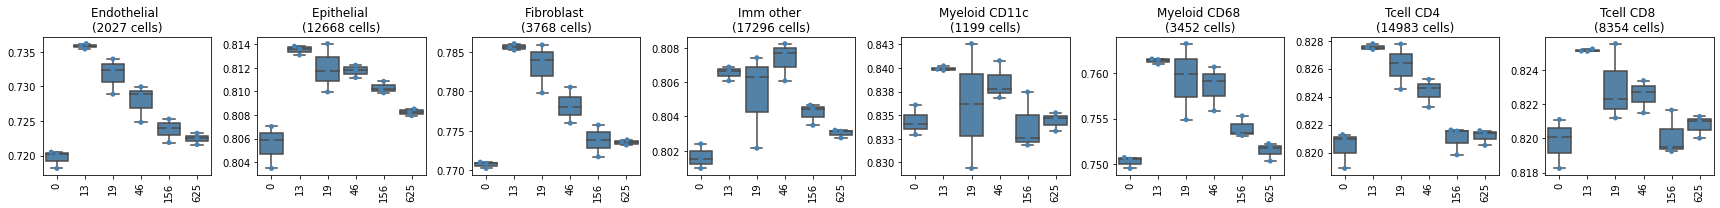

In [5]:
gs_linear.load_target_cell_evaluation()

gs_linear.plot_target_cell_evaluation(
    metric_show="r_squared_linreg",
    metric_select="r_squared_linreg",
    param_x="um_radius",
)

In [6]:
clm = ncem.interpretation.InterpreterInteraction()
clm.load_model(
    results_path=dir_gs,
    gs_id="210419_INTERACTIONS_MAX_NODES_IMAGE_1_HARTMANN",
    cv_idx=0,
    model_id=test_id_interaction,
)
clm._fn_model_weights
clm.get_data_again(
    data_path=dir_data + "hartmann/",
    data_origin="hartmann"
)
clm.split_data_byidx_again(cv_idx=0)

clm.init_model_again()
clm.load_weights_again()
clm.cond_type = 'max'

210419_INTERACTIONS_MAX_NODES_IMAGE_1_HARTMANN: loaded 24 runs with 3-fold cross validation
cross-validation selected: cv0
loaded model 210419_interactions_max_nodes_image_1_hartmann_adam_lr1_agrFalse_predecTrue_bsS_md1_tk4_n10_fsstandard_ldi1_ei1_di1_ede1_dde1_dr1_l2N_l1N_COND_cde1_cbTrue_cdi1_cdr1_cnh1_cl21
Loading data from raw files
registering celldata


/home/icb/anna.schaar/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:119: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


collecting image-wise celldata


/home/icb/anna.schaar/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/home/icb/anna.schaar/miniconda3/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


adding graph-level covariates


/mnt/home/icb/anna.schaar/git/ncem/ncem/data.py:1447: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  tissue_meta_data = read_excel(self.data_path + "scMEP_sample_description.xlsx", usecols=usecols)
100%|██████████| 58/58 [00:00<00:00, 129.31it/s]


Loaded 58 images with complete data from 4 patients over 63747 cells with 36 cell features and 8 distinct celltypes.
Mean of mean node degree per images across images: 4.416036
cross-validation selected: cv0


In [7]:
lm = ncem.interpretation.InterpreterInteraction()
lm.load_model(
    results_path=dir_gs,
    gs_id="210419_INTERACTIONS_BASELINE_NONE_NODES_IMAGE_1_HARTMANN",
    cv_idx=0,
    #model_id=test_id_interaction,
)
lm._fn_model_weights
lm.get_data_again(
    data_path=dir_data + "hartmann/",
    data_origin="hartmann"
)
lm.split_data_byidx_again(cv_idx=0)

lm.init_model_again()
lm.load_weights_again()
lm.cond_type = 'max'

210419_INTERACTIONS_BASELINE_NONE_NODES_IMAGE_1_HARTMANN: loaded 1 runs with 3-fold cross validation
cross-validation selected: cv0
loaded model 210419_interactions_baseline_none_nodes_image_1_hartmann_adam_lr1_agrFalse_predecTrue_bsS_md0_tk4_n10_fsstandard_ldi1_ei1_di1_ede1_dde1_dr1_l2N_l1N_COND_cde1_cbTrue_cdi1_cdr1_cnh1_cl21
Loading data from raw files
registering celldata


/home/icb/anna.schaar/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:119: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/icb/anna.schaar/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/home/icb/anna.schaar/miniconda3/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
/mnt/home/icb/anna.schaar/git/ncem/ncem/data.py:1447: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified.

collecting image-wise celldata
adding graph-level covariates


100%|██████████| 58/58 [00:00<00:00, 165.04it/s]


Loaded 58 images with complete data from 4 patients over 63747 cells with 36 cell features and 8 distinct celltypes.
Mean of mean node degree per images across images: 0.000000
cross-validation selected: cv0


In [8]:
clm.reinitialize_model(changed_model_kwargs={'input_shapes': (8, 36, 64, 1, 0, 58)})
lm.reinitialize_model(changed_model_kwargs={'input_shapes': (8, 36, 64, 1, 0, 58)})

setting reinitialized layer weights to layer weights from model 210419_interactions_max_nodes_image_1_hartmann_adam_lr1_agrFalse_predecTrue_bsS_md1_tk4_n10_fsstandard_ldi1_ei1_di1_ede1_dde1_dr1_l2N_l1N_COND_cde1_cbTrue_cdi1_cdr1_cnh1_cl21
setting reinitialized layer weights to layer weights from model 210419_interactions_baseline_none_nodes_image_1_hartmann_adam_lr1_agrFalse_predecTrue_bsS_md0_tk4_n10_fsstandard_ldi1_ei1_di1_ede1_dde1_dr1_l2N_l1N_COND_cde1_cbTrue_cdi1_cdr1_cnh1_cl21


In [9]:
adata_img, adata_CD8Tcells = clm.target_cell_relative_performance(
    image_key=['scMEP_point_1', 'scMEP_point_5', 'scMEP_point_8', 'scMEP_point_16'],
    baseline_model=lm,
    target_cell_type='Tcell CD8',
    n_neighbors=60,
    n_pcs=None,
)

  0%|          | 0/5507 [00:00<?, ?it/s]

ATTENTION: specifying reinit_n_eval will change class argument n_eval_nodes_per_graph from 10 to 1


100%|██████████| 5507/5507 [01:16<00:00, 71.89it/s] 
/home/icb/anna.schaar/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/home/icb/anna.schaar/miniconda3/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


n cells:  1329
Tcell CD8 0    306
Tcell CD8 1    278
Tcell CD8 2    258
Tcell CD8 3    256
Tcell CD8 4    231
Name: Tcell CD8 substates, dtype: int64


In [11]:
interpreter = ncem.interpretation.interpreter.InterpreterGraph()
interpreter.get_data(
    data_origin='hartmann',
    data_path=dir_data + 'hartmann/',
    radius=35,
    node_label_space_id='type',
    node_feature_space_id='standard',
    merge_node_types_predefined=True
)
print('\n Celldata metadata:', interpreter.data.celldata.uns['metadata'])

adata, adata_substates, log_pval, fold_change = interpreter.data.compute_cluster_enrichment(
    image_key=['scMEP_point_1', 'scMEP_point_5', 'scMEP_point_8', 'scMEP_point_16'],
    target_cell_type='Tcell CD8',
    clip_pvalues=-5,
    n_neighbors=60,
    n_pcs=None
)

Loading data from raw files
registering celldata


/home/icb/anna.schaar/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:119: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


collecting image-wise celldata


/home/icb/anna.schaar/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/home/icb/anna.schaar/miniconda3/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
/mnt/home/icb/anna.schaar/git/ncem/ncem/data.py:1447: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  tissue_meta_data = read_excel(self.data_path + "scMEP_sample_description.xlsx", usecols=usecols)
 28%|██▊       | 16/58 [00:00<00:00, 157.42it/s]

adding graph-level covariates


  2%|▏         | 3/124 [00:00<00:04, 26.71it/s]

Loaded 58 images with complete data from 4 patients over 63747 cells with 36 cell features and 8 distinct celltypes.
Mean of mean node degree per images across images: 4.416036

 Celldata metadata: {'lateral_resolution': 0.390625, 'fn': ['scMEP_MIBI_singlecell/scMEP_MIBI_singlecell.csv', 'scMEP_sample_description.xlsx'], 'image_col': 'point', 'pos_cols': ['center_colcoord', 'center_rowcoord'], 'cluster_col': 'Cluster', 'cluster_col_preprocessed': 'Cluster_preprocessed', 'patient_col': 'donor'}


 93%|█████████▎| 115/124 [00:04<00:00, 24.25it/s]/home/icb/anna.schaar/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/home/icb/anna.schaar/miniconda3/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
100%|██████████| 124/124 [00:11<00:00, 10.97it/s]

n cells:  1329
Tcell CD8 0    304
Tcell CD8 1    293
Tcell CD8 2    278
Tcell CD8 3    247
Tcell CD8 4    207
Name: Tcell CD8_substates, dtype: int64


In [14]:
import pandas as pd
results = pd.merge(
    adata_substates.obs, adata_CD8Tcells.obs[['point', 'cell_id', 'relative_r_squared',]], on=["cell_id", "point"], how="left"
)
results.index = results.index.map(str)

In [15]:
adata_combined = adata_substates.copy()
adata_combined.obs = results

In [16]:
adata_combined.obs['Tcell CD8_substates'].value_counts()

Tcell CD8 0    304
Tcell CD8 1    293
Tcell CD8 2    278
Tcell CD8 3    247
Tcell CD8 4    207
Name: Tcell CD8_substates, dtype: int64

<AxesSubplot:xlabel='UMAP1', ylabel='UMAP2'>

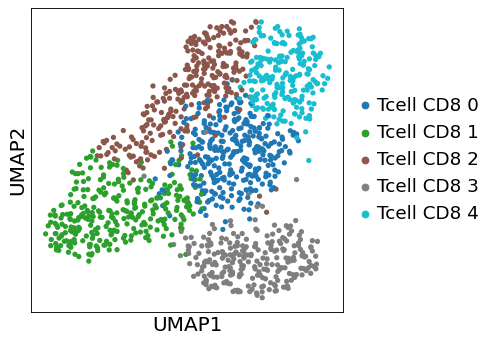

In [21]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
sc.set_figure_params(scanpy=True, fontsize=18)
sc.pl.umap(adata_combined, color='Tcell CD8_substates', palette='tab10', ax=ax, show=False, title='')

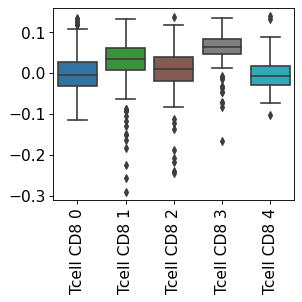

In [22]:
clm.plot_substate_performance(adata=adata_combined, target_cell_type='Tcell CD8')

... storing 'point' as categorical
... storing 'Cluster' as categorical
... storing 'Cluster_preprocessed' as categorical
... storing 'point' as categorical
... storing 'Cluster' as categorical
... storing 'Cluster_preprocessed' as categorical
... storing 'point' as categorical
... storing 'Cluster' as categorical
... storing 'Cluster_preprocessed' as categorical
... storing 'point' as categorical
... storing 'Cluster' as categorical
... storing 'Cluster_preprocessed' as categorical


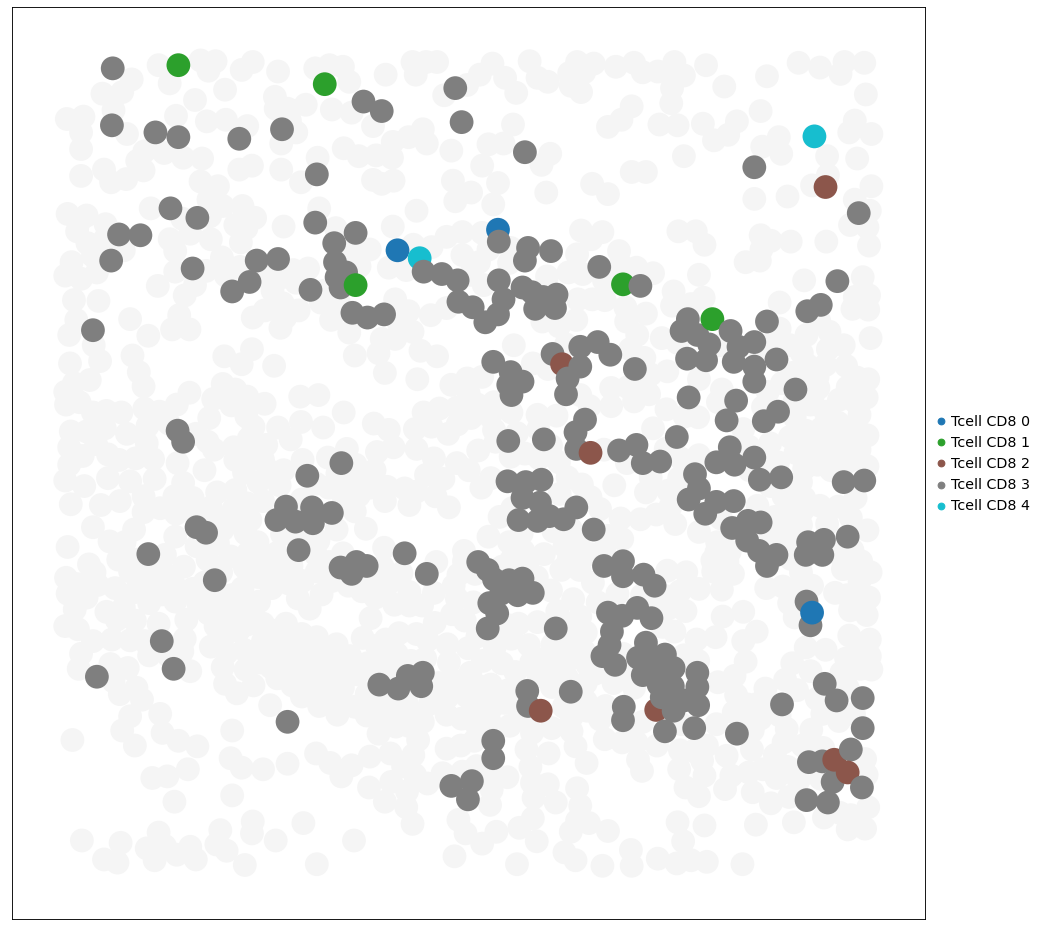

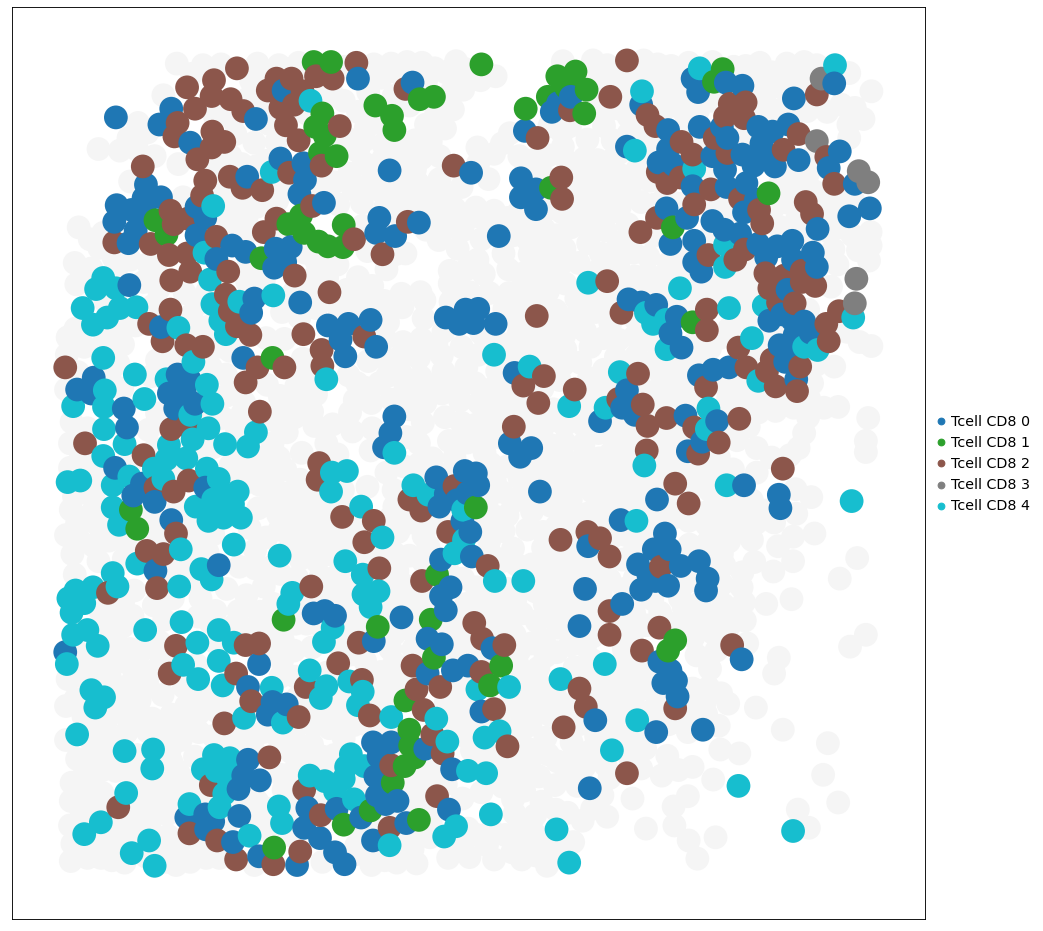

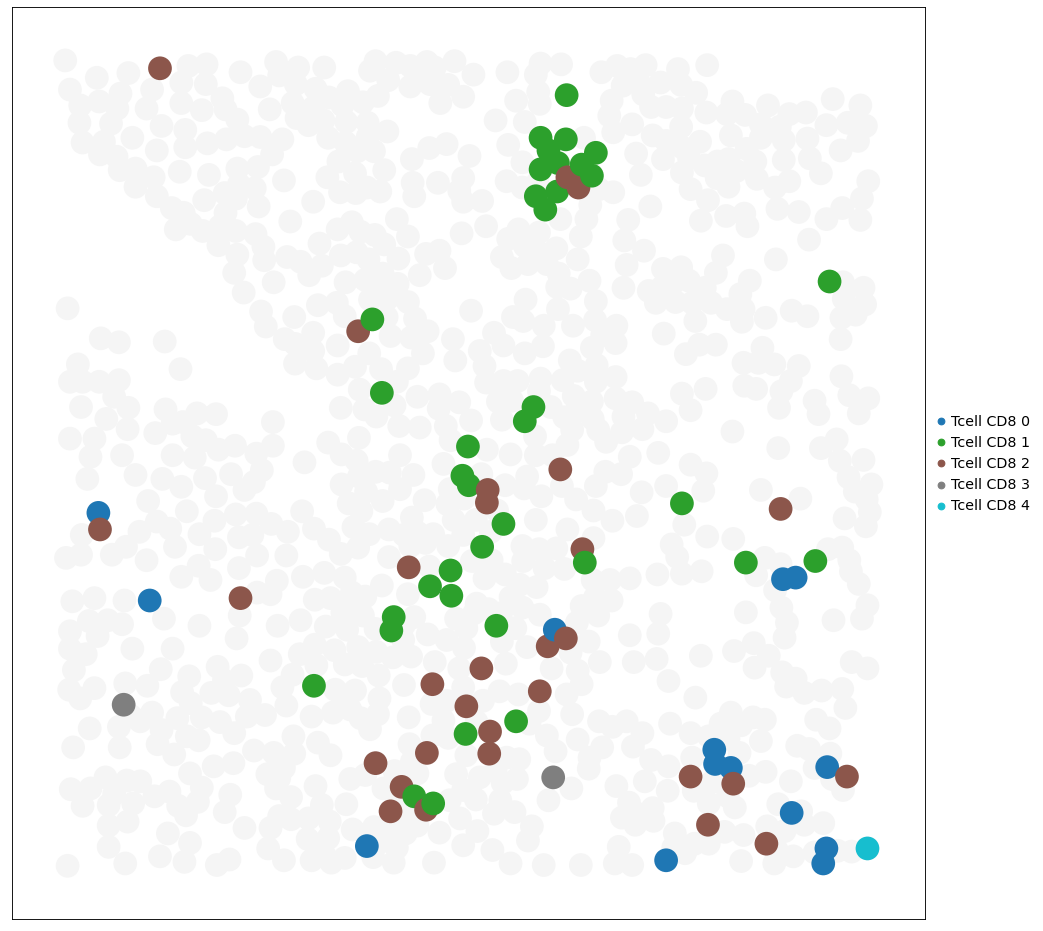

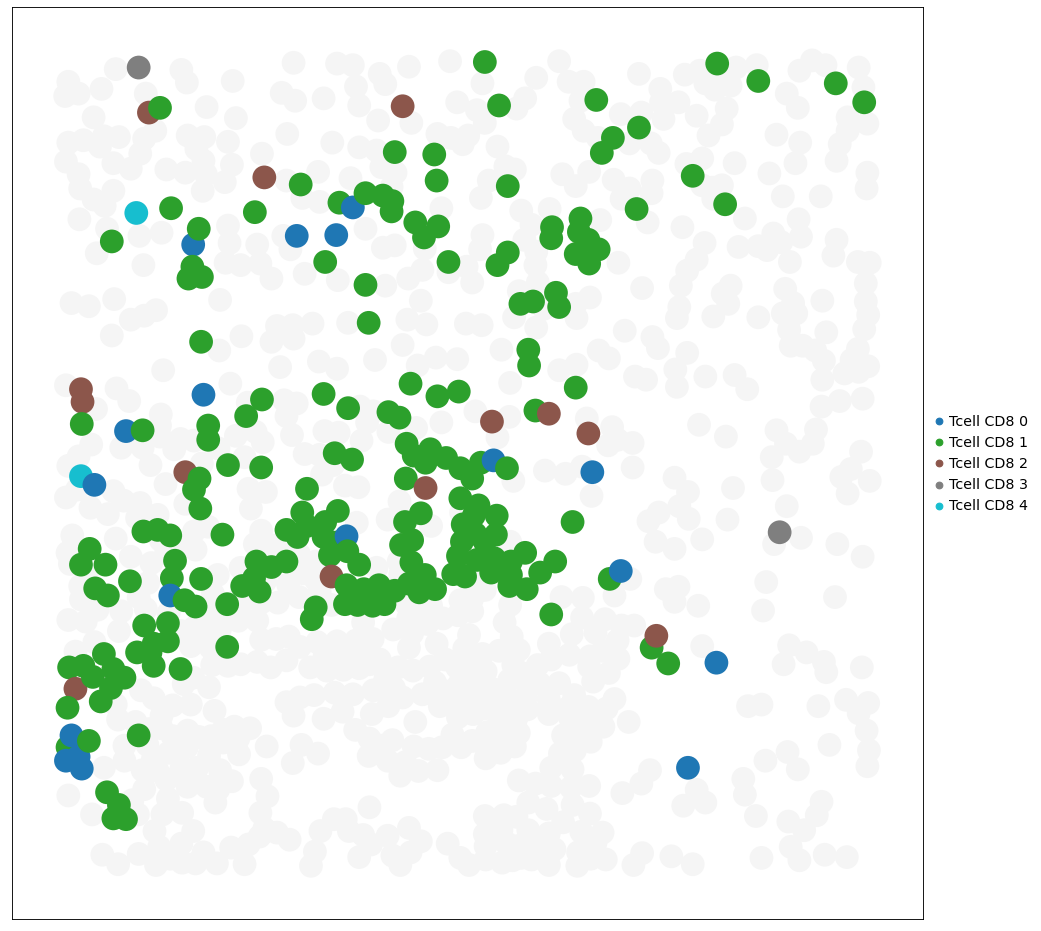

In [124]:
import matplotlib.pyplot as plt
img_keys = ['scMEP_point_1', 'scMEP_point_5', 'scMEP_point_8', 'scMEP_point_16']
for k in img_keys:
    temp_adata = adata_img[adata_img.obs['point'] == k]
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 15))
    sc.pl.spatial(
        adata_img[adata_img.obs['point'] == k].copy(),
        spot_size=30,
        ax=ax,
        show=False,
        na_color='whitesmoke',
        title=''
    )
    sc.pl.spatial(
        adata_combined[adata_combined.obs['point'] == k].copy(),
        color='Tcell CD8_substates',
        spot_size=30,
        ax=ax,
        show=False,
        title='',
    )
    ax.invert_yaxis()
    ax.set_xlabel('')
    ax.set_ylabel('')

... storing 'point' as categorical
... storing 'Cluster' as categorical
... storing 'Cluster_preprocessed' as categorical
... storing 'point' as categorical
... storing 'Cluster' as categorical
... storing 'Cluster_preprocessed' as categorical
... storing 'point' as categorical
... storing 'Cluster' as categorical
... storing 'Cluster_preprocessed' as categorical
... storing 'point' as categorical
... storing 'Cluster' as categorical
... storing 'Cluster_preprocessed' as categorical
... storing 'point' as categorical
... storing 'Cluster' as categorical
... storing 'Cluster_preprocessed' as categorical
... storing 'point' as categorical
... storing 'Cluster' as categorical
... storing 'Cluster_preprocessed' as categorical
... storing 'point' as categorical
... storing 'Cluster' as categorical
... storing 'Cluster_preprocessed' as categorical
... storing 'point' as categorical
... storing 'Cluster' as categorical
... storing 'Cluster_preprocessed' as categorical


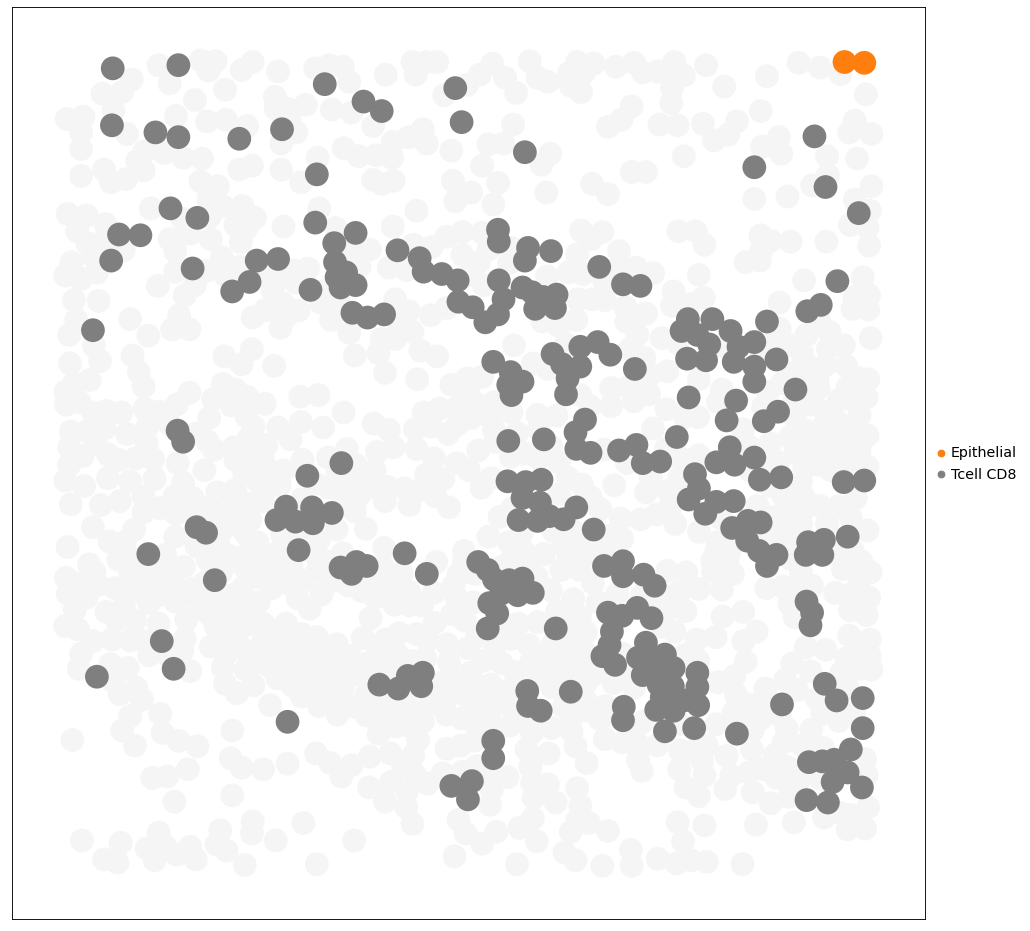

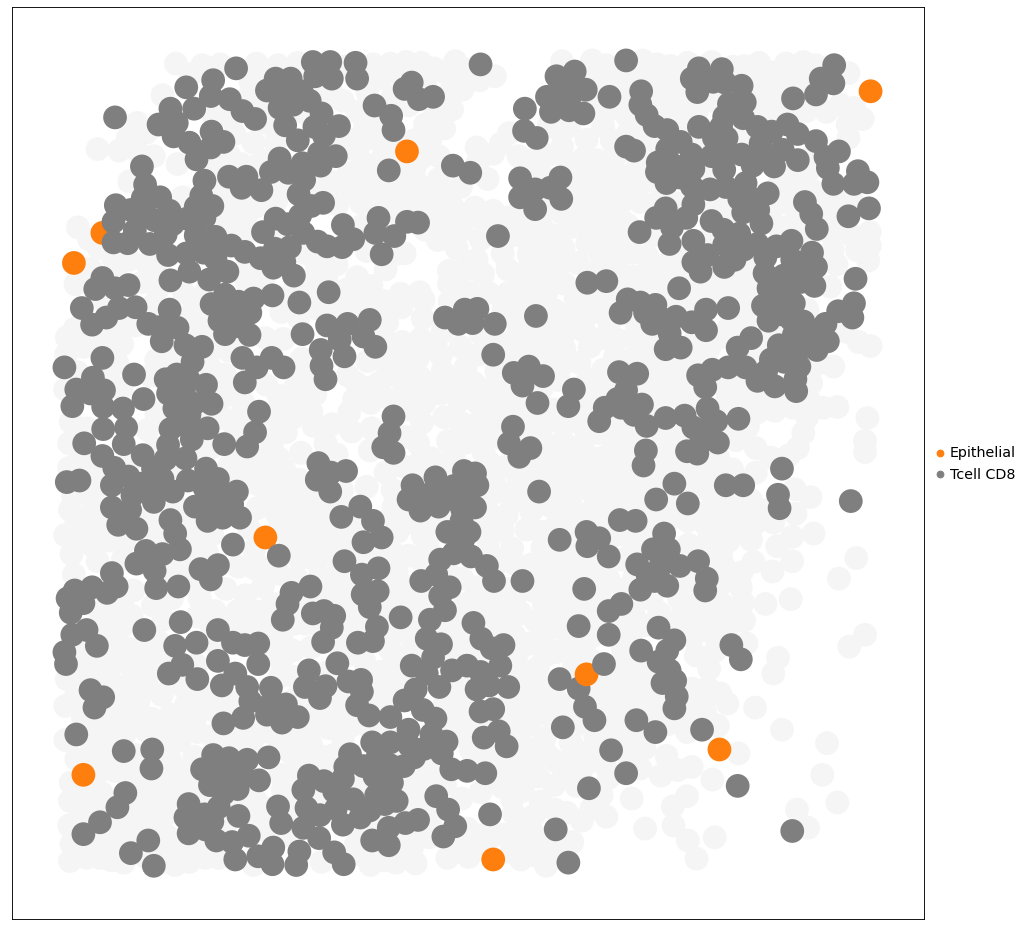

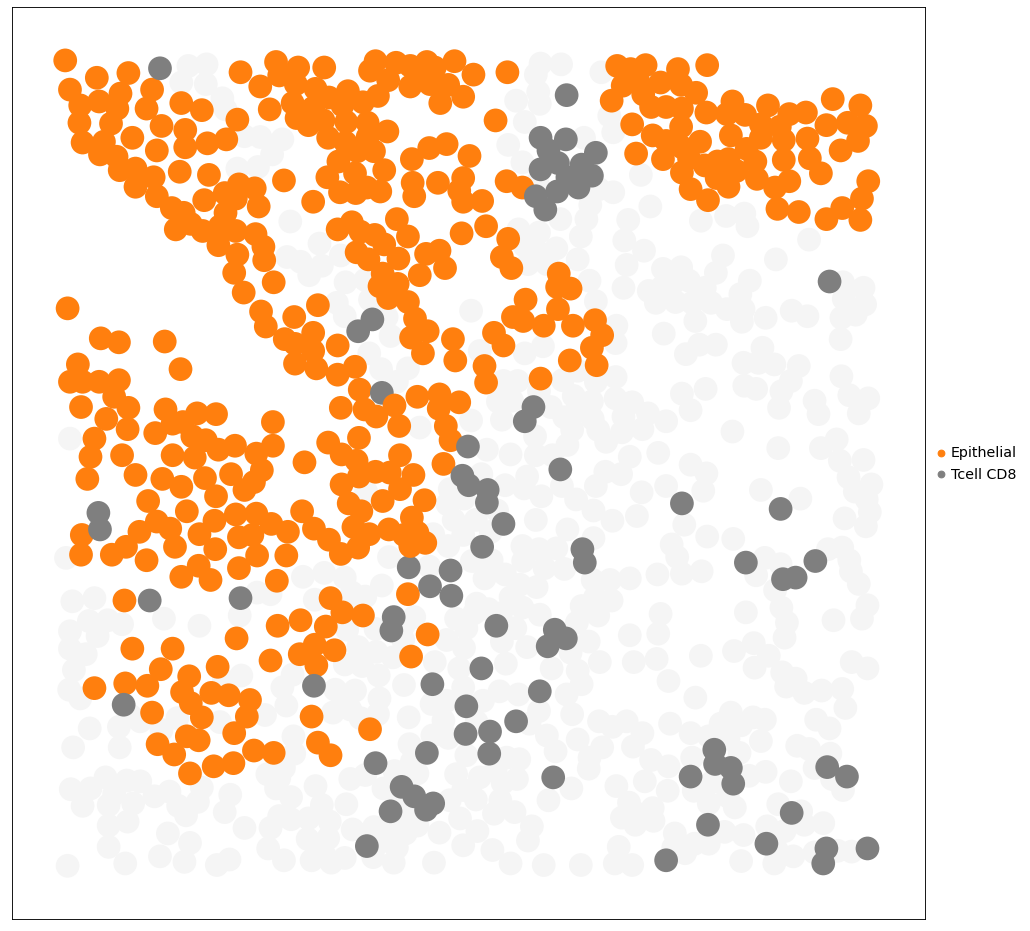

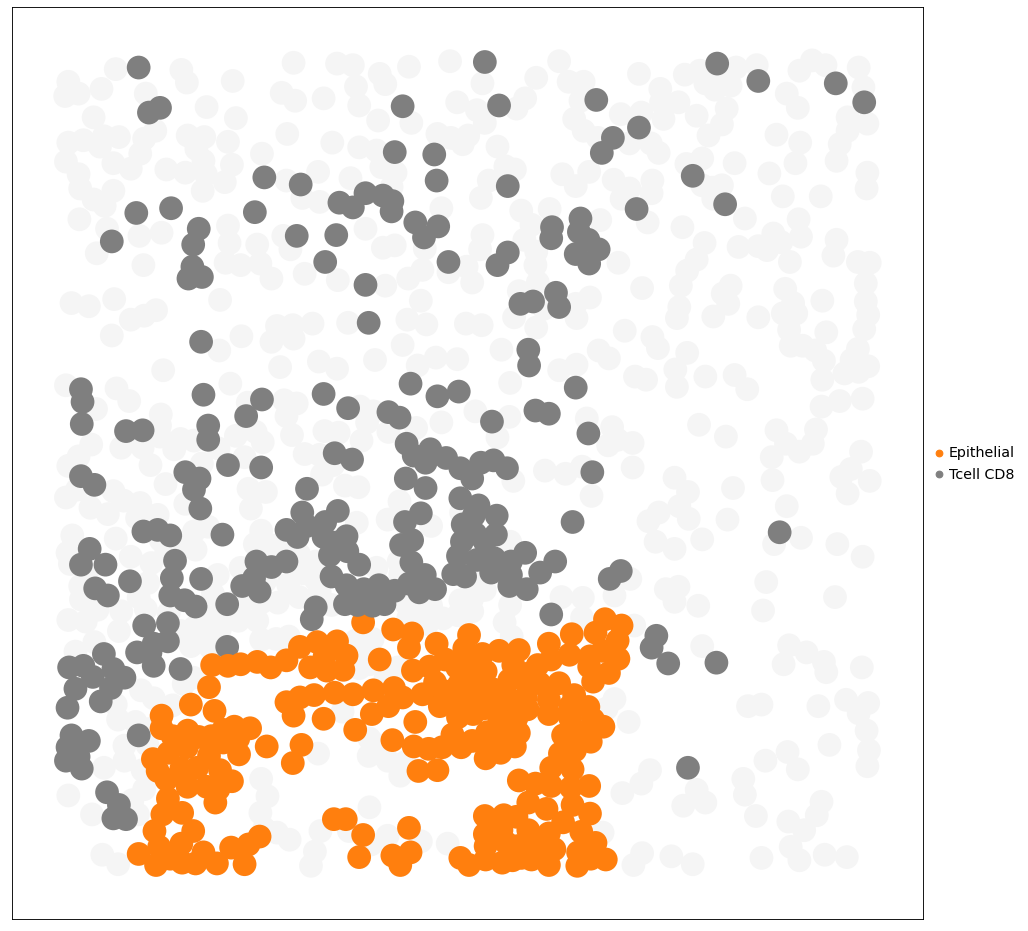

In [125]:
for k in img_keys:
    temp_adata = adata_img[adata_img.obs['point'] == k]
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 15))
    sc.pl.spatial(
        temp_adata[temp_adata.obs['Cluster_preprocessed'] != 'Tcell CD8'].copy(),
        spot_size=30,
        ax=ax,
        show=False,
        na_color='whitesmoke',
        title=''
    )
    sc.pl.spatial(
        temp_adata[temp_adata.obs['Cluster_preprocessed'].isin(['Tcell CD8', 'Epithelial'])].copy(),
        color='Cluster_preprocessed',
        spot_size=30,
        ax=ax,
        show=False,
        title='',
        palette={'Epithelial': '#ff7f0e', 'Tcell CD8': '#7f7f7f'}
    )
    ax.invert_yaxis()
    ax.set_xlabel('')
    ax.set_ylabel('')

... storing 'point' as categorical
... storing 'Cluster' as categorical
... storing 'Cluster_preprocessed' as categorical
... storing 'point' as categorical
... storing 'Cluster' as categorical
... storing 'Cluster_preprocessed' as categorical
... storing 'point' as categorical
... storing 'Cluster' as categorical
... storing 'Cluster_preprocessed' as categorical
... storing 'point' as categorical
... storing 'Cluster' as categorical
... storing 'Cluster_preprocessed' as categorical


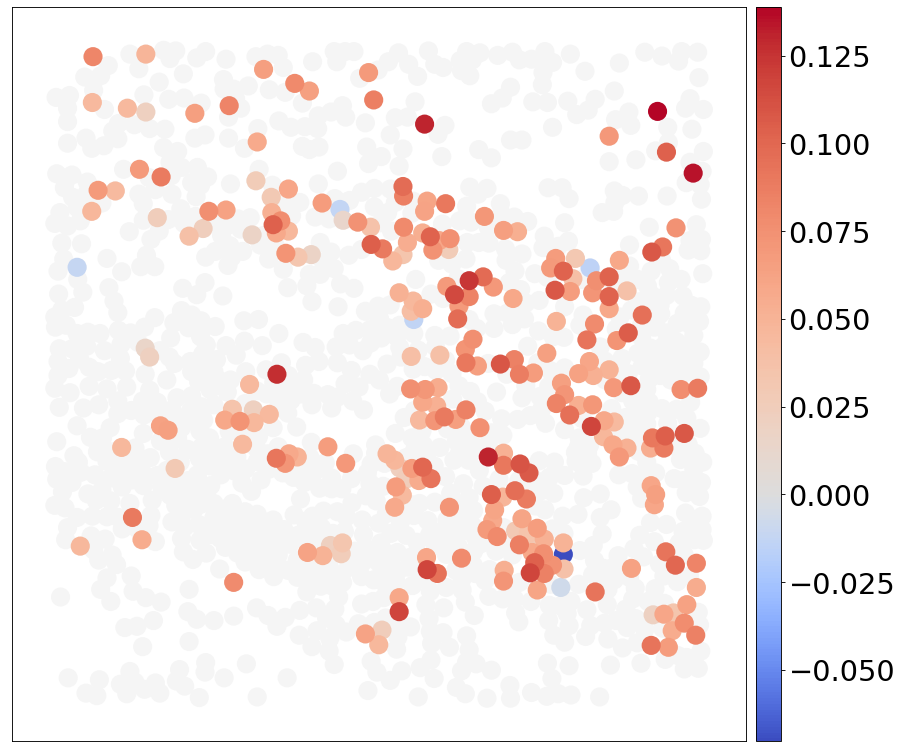

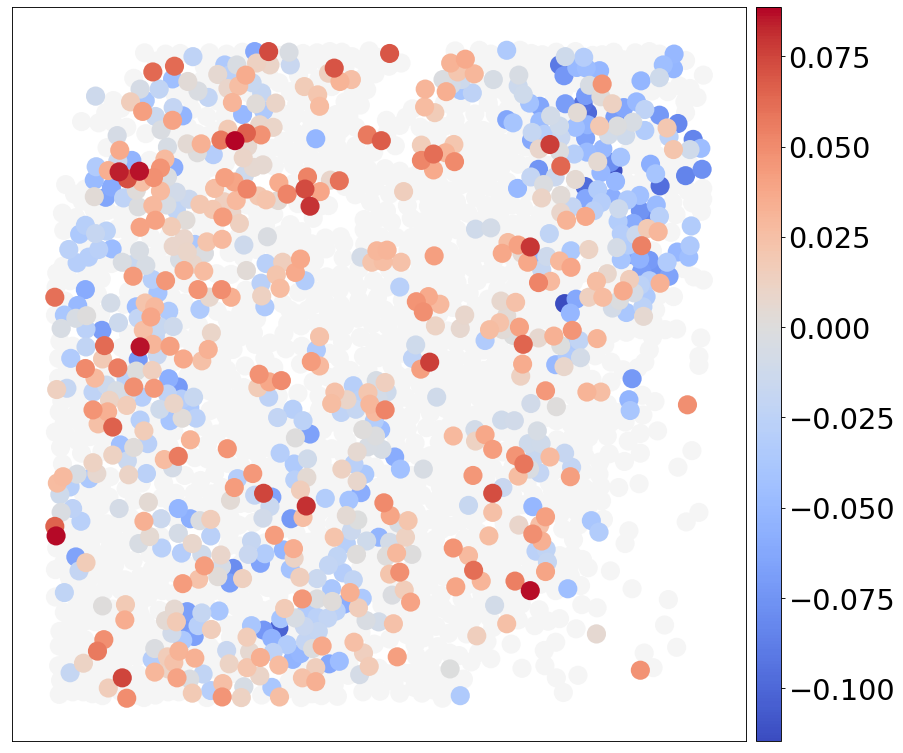

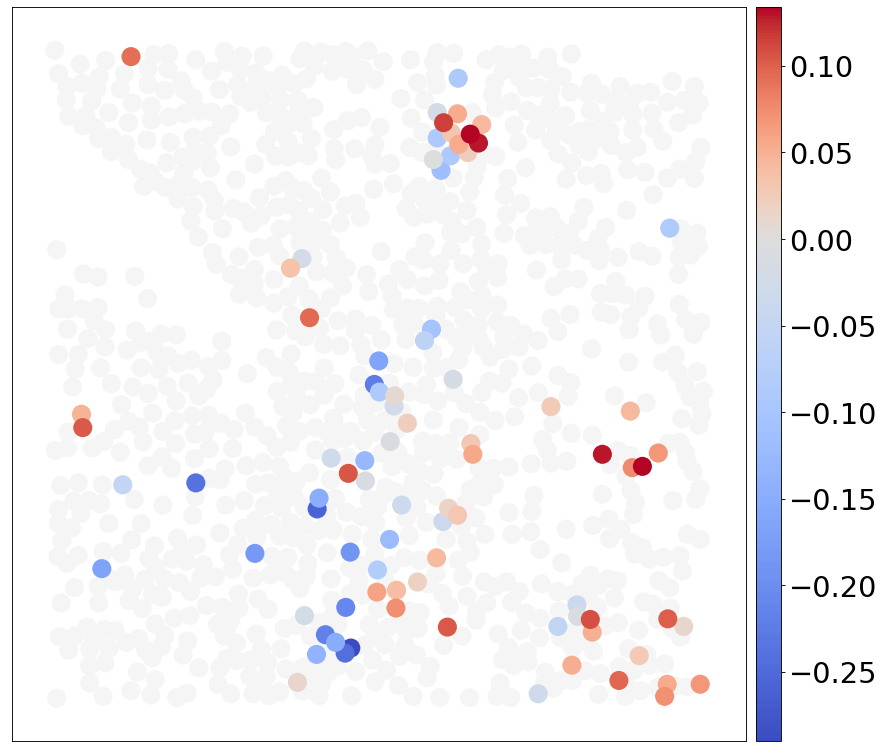

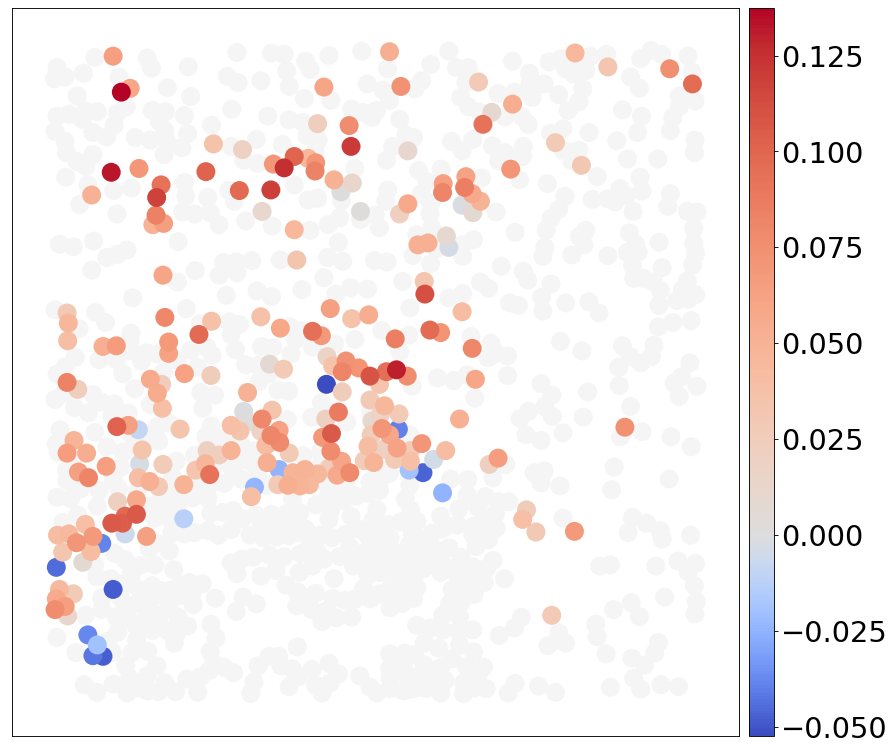

In [24]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
class MidpointNormalize(colors.Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a
        # simple example...
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

sc.set_figure_params(scanpy=True, fontsize=26)
img_keys = ['scMEP_point_1', 'scMEP_point_5', 'scMEP_point_8', 'scMEP_point_16']
for k in img_keys:
    temp_adata = adata_img[adata_img.obs['point'] == k]
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 10))
    sc.pl.spatial(
        adata_img[adata_img.obs['point'] == k].copy(),
        spot_size=30,
        ax=ax,
        show=False,
        na_color='whitesmoke',
        title=''
    )
    sc.pl.spatial(
        adata_combined[adata_combined.obs['point'] == k].copy(),
        color='relative_r_squared',
        spot_size=30,
        cmap='coolwarm',
        norm=MidpointNormalize(midpoint=0.), 
        ax=ax,
        show=False,
        title=''
    )
    ax.invert_yaxis()
    ax.set_xlabel('')
    ax.set_ylabel('')
    # Save, show and return figure.
    plt.tight_layout()

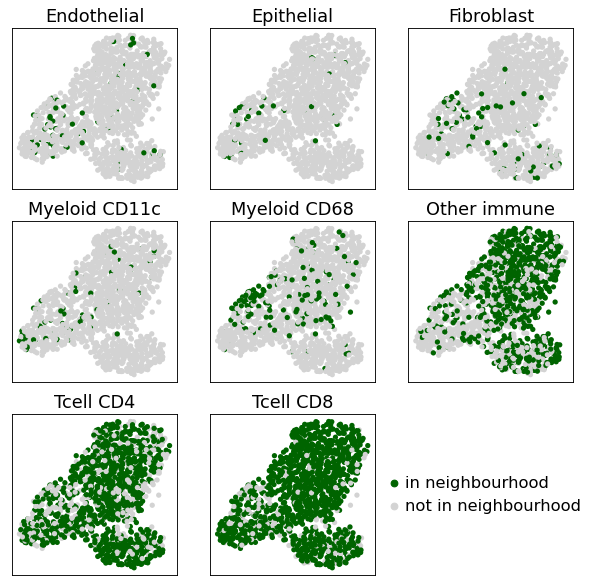

In [25]:
filter_titles = list(np.unique(interpreter.data.celldata.obs['Cluster_preprocessed']))
for i, x in enumerate(filter_titles):
    adata_combined.uns[f"source type {x}_colors"] = ['darkgreen', 'lightgrey']
sc.set_figure_params(scanpy=True, fontsize=16)
plt.ioff()
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(9, 9), )
N = len(filter_titles)
axs = axs.flat
for ax in axs[N:]:
    ax.remove()
ax = axs[:N]

for i, x in enumerate(filter_titles[:-1]):
    sc.pl.umap(
        adata_combined,
        color=f"source type {x}",
        title=x,
        show=False,
        #size=200,
        legend_loc='None',
        ax=ax[i]
    )
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
sc.pl.umap(
    adata_combined,
    color=f"source type {filter_titles[-1]}",
    title=filter_titles[-1],
    show=False,
    #size=50,
    ax=ax[N-1]
)
ax[N-1].set_xlabel('')
ax[N-1].set_ylabel('')
# Save, show and return figure.
plt.show()

In [28]:
filter_titles

['Endothelial',
 'Epithelial',
 'Fibroblast',
 'Myeloid CD11c',
 'Myeloid CD68',
 'Other immune',
 'Tcell CD4',
 'Tcell CD8']

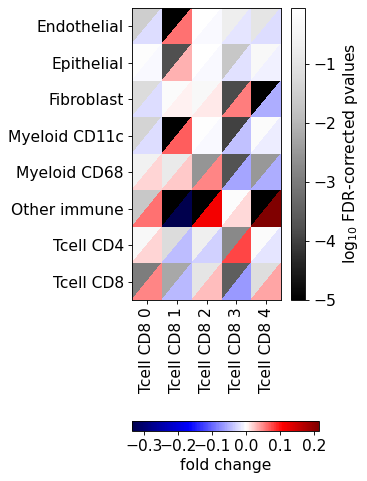

In [27]:
interpreter.data.cluster_enrichment(
    pvalues=log_pval, 
    fold_change=fold_change,
    fontsize=14,
    panel_width=3,
    panel_height=8,
    pad=0.25,
)